# Traffic sign recognition
#### German traffic sign benchmark dataset

In [113]:
# Import main libraries
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
%matplotlib inline

# Import resource
from src.preprocessors.HistogramEqualizer import HistogramEqualizer
from src.preprocessors.Normalizer import Normalizer

from src.DataGenerator import DataGenerator
from src.models.Model import Model
from src.models.SGDModel import SGDModel
from src.models.Xception import Xception
from src.Pipeline import Pipeline


In [114]:
# usefull setting variables
image_shape = 72
batch_size = 32
epochs = 3
data_train_path = 'data/train'
data_validation_path = 'data/validation'
data_test_path = 'data/test'
n_train_samples = 31367
n_valid_samples = 7842
n_test_samples = 12630
workers = 1
use_multiprocessing = False
pipeline = Pipeline()
pipeline.add_preprocessors((
            HistogramEqualizer(),
            Normalizer()
        ))

In [115]:
models = [
    {
        'title': 'Simple Model Grayscale',
        'class': Model,
        'color_mode': 'grayscale',
        'model_path': 'model/simple_model-grayscale-.json',
        'weights_path': 'model/weights/simple_model-grayscale-20-03-2019_14-20.h5',
        'history_path': 'log/history_simple_model-grayscale-20-03-2019_12-28.csv',
        'data_train_path': data_train_path,
        'data_validation_path': data_validation_path,
        'data_test_path': data_test_path,
        'model': None,
        'history': None,
        'scores': None,
    },
    {
        'title': 'Advanced Model Grayscale',
        'class': SGDModel,
        'color_mode': 'grayscale',
        'model_path': 'model/sgd_model-grayscale-.json',
        'weights_path': 'model/weights/sgd_model-grayscale-20-03-2019_20-12.h5',
        'history_path': 'log/history_sgd_model-grayscale-20-03-2019_14-22.csv',
        'data_train_path': data_train_path,
        'data_validation_path': data_validation_path,
        'data_test_path': data_test_path,
        'model': None,
        'history': None,
        'scores': None,
    },
    {
        'title': 'Xception Model Grayscale',
        'class': Xception,
        'color_mode': 'grayscale',
        'model_path': 'model/xception_model-grayscale-.json',
        'weights_path': 'model/weights/xception_model-grayscale-21-03-2019_19-04.h5',
        'history_path': 'log/history_xception_model-grayscale-20-03-2019_17-12.csv',
        'data_train_path': data_train_path,
        'data_validation_path': data_validation_path,
        'data_test_path': data_test_path,
        'model': None,
        'history': None,
        'scores': None,
    },
    {
        'title': 'Simple Model RGB',
        'class': Model,
        'color_mode': 'rgb',
        'model_path': 'model/simple_model-rgb-.json',
        'weights_path': 'model/weights/simple_model-rgb-20-03-2019_22-05.h5',
        'history_path': 'log/history_simple_model-rgb-20-03-2019_20-13.csv',
        'data_train_path': data_train_path,
        'data_validation_path': data_validation_path,
        'data_test_path': data_test_path,
        'model': None,
        'history': None,
        'scores': None,
    },
    {
        'title': 'Advanced Model RGB',
        'class': SGDModel,
        'color_mode': 'rgb',
        'model_path': 'model/sgd_model-rgb-.json',
        'weights_path': 'model/weights/sgd_model-rgb-21-03-2019_04-02.h5',
        'history_path': 'log/history_sgd_model-rgb-20-03-2019_22-05.csv',
        'data_train_path': data_train_path,
        'data_validation_path': data_validation_path,
        'data_test_path': data_test_path,
        'model': None,
        'history': None,
        'scores': None,
    },
    {
        'title': 'Simple Model Grayscale Using ROI',
        'class': Model,
        'color_mode': 'grayscale',
        'model_path': 'model/simple_model-grayscale-.json',
        'weights_path': 'model/weights/simple_model-grayscale-21-03-2019_05-48.h5',
        'history_path': 'log/history_simple_model-grayscale-21-03-2019_04-03.csv',
        'data_train_path': data_train_path + '_roi',
        'data_validation_path': data_validation_path + '_roi',
        'data_test_path': data_test_path + '_roi',
        'model': None,
        'history': None,
        'scores': None,
    },
    {
        'title': 'Advanced Model Grayscale Using ROI',
        'class': SGDModel,
        'color_mode': 'grayscale',
        'model_path': 'model/sgd_model-grayscale-.json',
        'weights_path': 'model/weights/sgd_model-grayscale-21-03-2019_11-37.h5',
        'history_path': 'log/history_sgd_model-grayscale-21-03-2019_05-51.csv',
        'data_train_path': data_train_path + '_roi',
        'data_validation_path': data_validation_path + '_roi',
        'data_test_path': data_test_path + '_roi',
        'model': None,
        'history': None,
        'scores': None,
    },
    {
        'title': 'Simple Model RGB Using ROI',
        'class': Model,
        'color_mode': 'rgb',
        'model_path': 'model/simple_model-rgb-.json',
        'weights_path': 'model/weights/simple_model-rgb-21-03-2019_13-32.h5',
        'history_path': 'log/history_simple_model-rgb-21-03-2019_11-39.csv',
        'data_train_path': data_train_path + '_roi',
        'data_validation_path': data_validation_path + '_roi',
        'data_test_path': data_test_path + '_roi',
        'model': None,
        'history': None,
        'scores': None,
    },
    {
        'title': 'Advanced Model RGB Using ROI',
        'class': SGDModel,
        'color_mode': 'rgb',
        'model_path': 'model/sgd_model-rgb-.json',
        'weights_path': 'model/weights/sgd_model-rgb-21-03-2019_19-27.h5',
        'history_path': 'log/history_sgd_model-rgb-21-03-2019_13-32.csv',
        'data_train_path': data_train_path + '_roi',
        'data_validation_path': data_validation_path + '_roi',
        'data_test_path': data_test_path + '_roi',
        'model': None,
        'history': None,
        'scores': None,
    },
]

### Test models

In [152]:
def create_model(model_dict):
    if model_dict['color_mode'] == 'rgb':
        shape = (image_shape, image_shape, 3)
    else:
        shape = (image_shape, image_shape, 1)
    model = model_dict['class']()
    
    model.load_model(model_dict['model_path'])
    model.compile()
    model.load_weights(model_dict['weights_path'])
    model.init_callbacks()
    
    model_dict['model'] = model

def read_history(model_dict):
    history = pd.read_csv(model_dict['history_path'], sep=",", header=0)
    model_dict['history'] = history
                             

def test_model(model_dict):
    test_generator = DataGenerator(
        model_dict['data_test_path'], 
        batch_size=batch_size,
        image_shape=(image_shape, image_shape),
        preprocessing_function=pipeline.evaluate
    )
    scores = model_dict['model'].evaluate_generator(
        test_generator.get_generator(color_mode=model_dict['color_mode']), 
        n_test_samples // batch_size)
    
    model_dict['scores'] = scores

In [179]:
scores_dataframe = pd.DataFrame(columns=['model', 'test_loss', 'test_acc'])
i = 0
for model_dict in models:
    if model_dict['model'] is None:
        model_dict = create_model(model_dict)
    if model_dict['history'] is None:
        read_history(model_dict)
    if model_dict['scores'] is None:
        model_dict = test_model(model_dict)
    scores_dataframe.loc[i] = [model_dict['title'], model_dict['scores'][0], model_dict['scores'][1]]
    i += 1


## Show Results

### Test Results

In [156]:
scores_dataframe.set_index('model', inplace=True)
scores_dataframe.sort_values(by=['test_acc'], inplace=True, ascending=False)
    
scores_dataframe

,test_loss,test_acc
model,,
Advanced Model RGB,0.111208,0.978585
Xception Model Grayscale,0.087862,0.977237
Advanced Model Grayscale,0.111480,0.976919
Advanced Model Grayscale Using ROI,0.160788,0.970654
Advanced Model RGB Using ROI,0.171445,0.967005
Simple Model Grayscale,0.188426,0.960184
Simple Model RGB,0.209742,0.960184
Simple Model RGB Using ROI,0.280281,0.949794
Simple Model Grayscale Using ROI,0.332303,0.943528


### Training and Validation Results

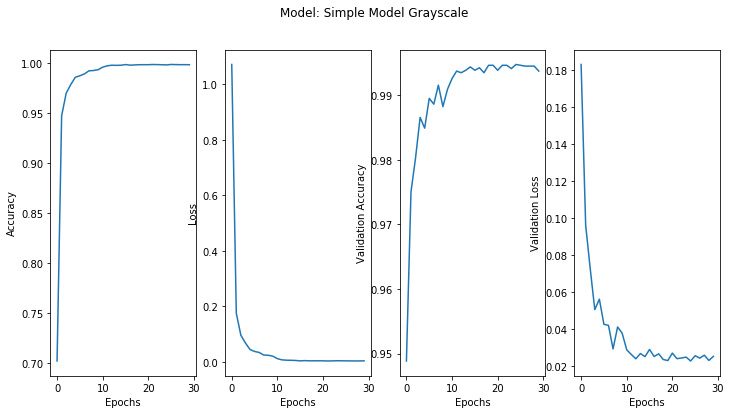

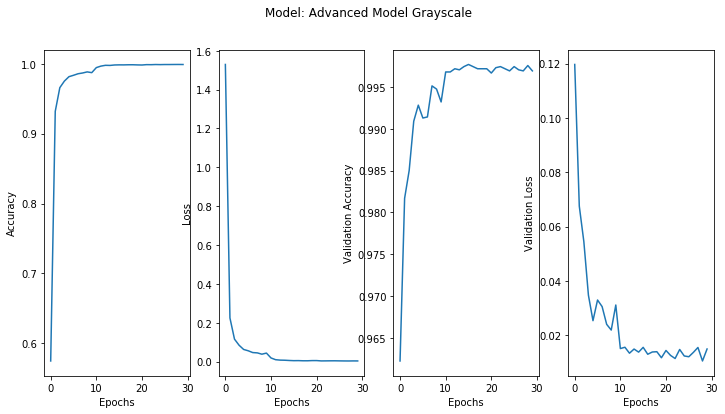

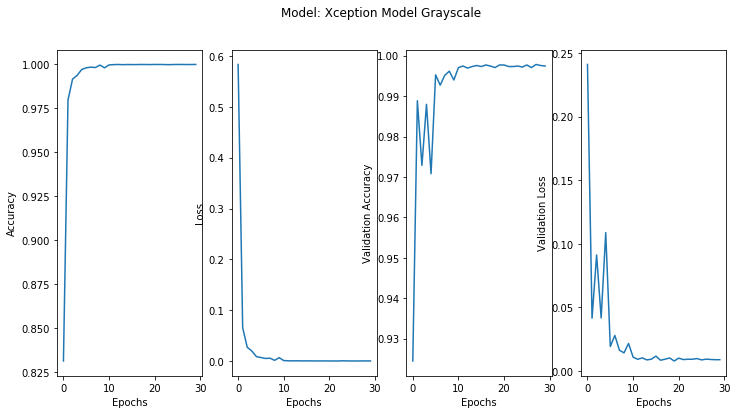

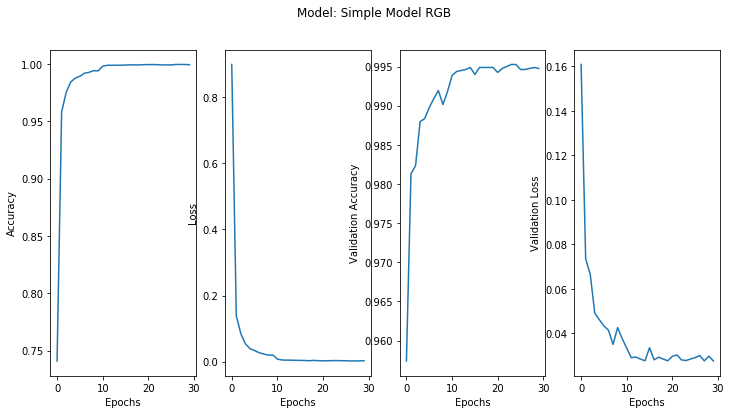

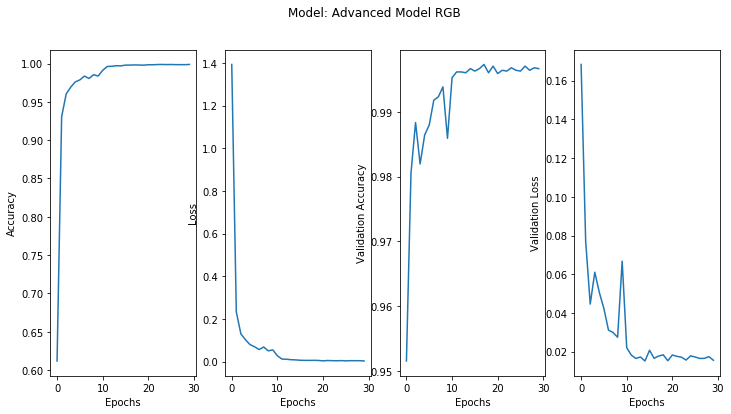

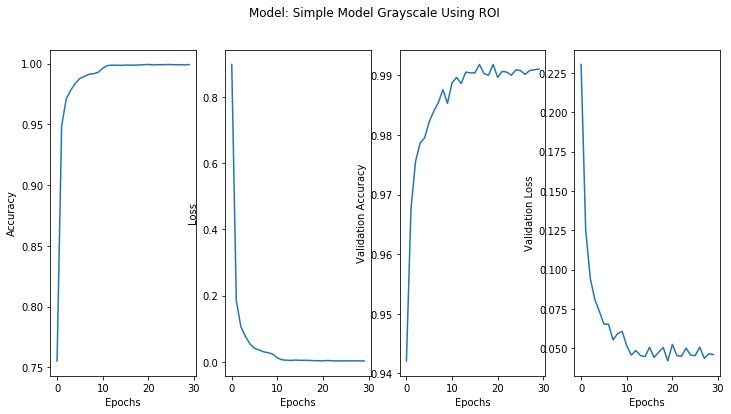

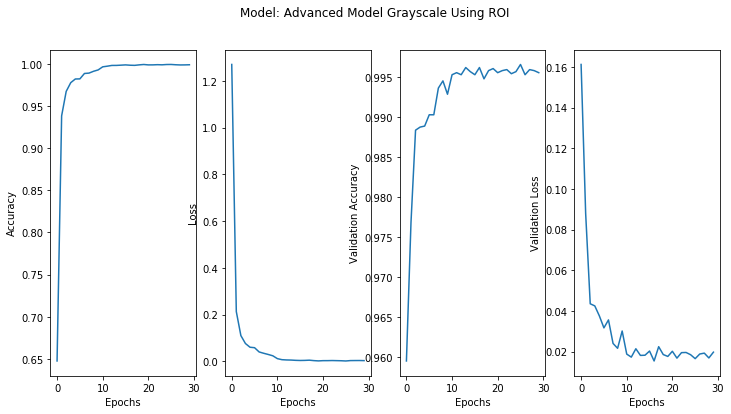

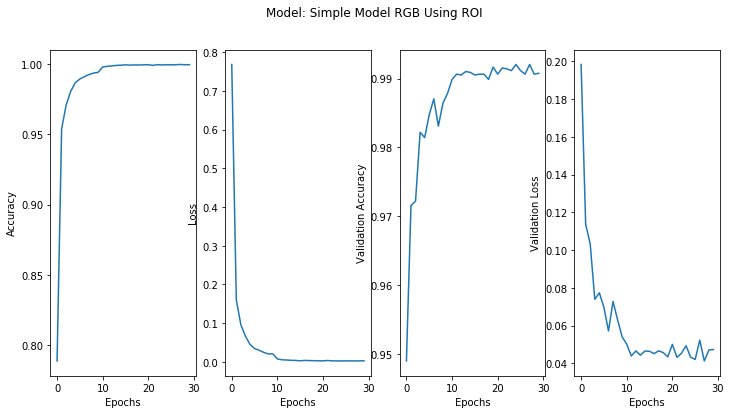

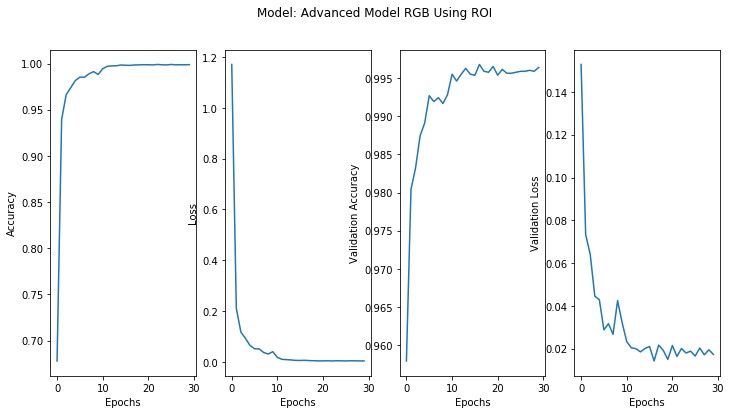

In [178]:


for model_dict in models:
    plt.figure(1, figsize=(12, 6))
    history = model_dict['history']
    plt.figure(1, figsize=(8, 4))
    plt.subplot(141)
    plt.plot(history['epoch'], history['acc'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.subplot(142)
    plt.plot(history['epoch'], history['loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.subplot(143)
    plt.plot(history['epoch'], history['val_acc'])
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.subplot(144)
    plt.plot(history['epoch'], history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.suptitle('Model: ' + model_dict['title'])
    plt.show()